<a href="https://colab.research.google.com/github/OwenGeeAndre/DataScience_MachineLearning/blob/main/5_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='10'><b>Logistic Regression</font>

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the data

In [4]:
data = pd.read_csv('/content/2.01.+Admittance.csv')

In [5]:
data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [6]:
df = data.copy()
df["Admitted"] = df["Admitted"].map({"Yes":1,"No":0})
df.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [7]:
y = df["Admitted"]
x = df["SAT"]

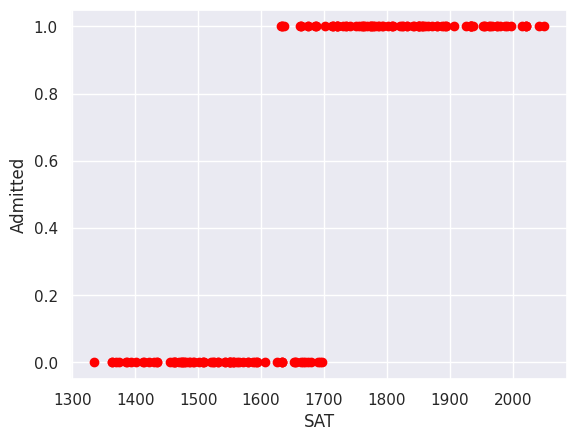

In [8]:
plt.scatter(x,y, color='red')
plt.xlabel("SAT")
plt.ylabel("Admitted");

/tmp/ipython-input-616079089.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x*results_lin.params[1] + results_lin.params[0]


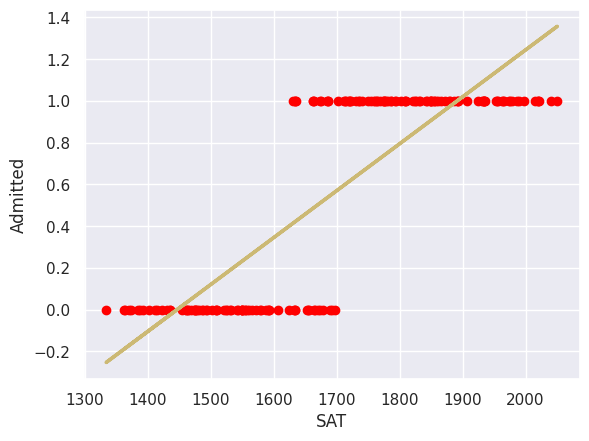

In [9]:
x1 = sm.add_constant(x)
reg_lin = sm.OLS(y,x1)
results_lin = reg_lin.fit()

plt.scatter(x,y, color='red')
y_hat = x*results_lin.params[1] + results_lin.params[0]
plt.plot(x,y_hat, lw=2.5, color = "C8")
plt.xlabel("SAT")
plt.ylabel("Admitted");

* awful fit

/tmp/ipython-input-237588118.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x,results_log.params[0],results_log.params[1]))


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


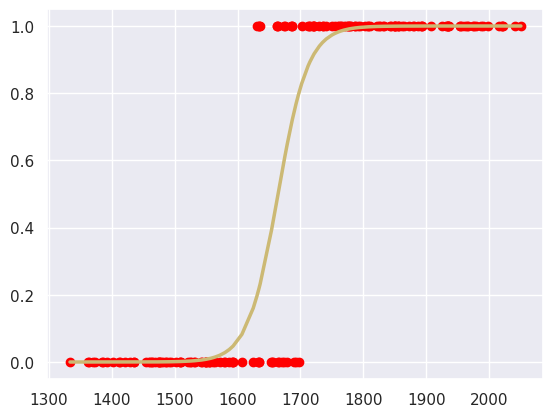

In [10]:
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()

def f(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

f_sorted = np.sort(f(x,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x))

plt.scatter(x,y, color='red')
plt.plot(x_sorted,f_sorted, lw=2.5, color = "C8")
plt.show()

# Regression

In [12]:
x1 = sm.add_constant(x)
reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


# Summary

In [13]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Dec 2025   Pseudo R-squ.:                  0.7992
Time:                        15:58:06   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""